In [2]:
import pandas as pd

# Load the three CSV files
df1 = pd.read_csv('Book1_1.csv')
df2 = pd.read_csv('Book1_2.csv')
df3 = pd.read_csv('Book1_3.csv')

# Concatenate the DataFrames
merged_df = pd.concat([df1, df2, df3], ignore_index=True)

       No. of Colors      Size    Comfort  \
count       20.00000  20.00000  20.000000   
mean         3.35000   8.35000   8.000000   
std          1.03999   1.03999   1.076055   
min          2.00000   7.00000   6.000000   
25%          2.75000   7.75000   7.000000   
50%          3.00000   8.00000   8.000000   
75%          4.00000   9.00000   9.000000   
max          5.00000  10.00000  10.000000   

       Durability/Quality/Performance (Quantifications)   Star Rating  
count                                         20.000000      20.00000  
mean                                           8.550000       4.25500  
std                                            0.887041       0.50521  
min                                            7.000000       3.20000  
25%                                            8.000000       3.80000  
50%                                            8.500000       4.20000  
75%                                            9.000000       4.55000  
max               

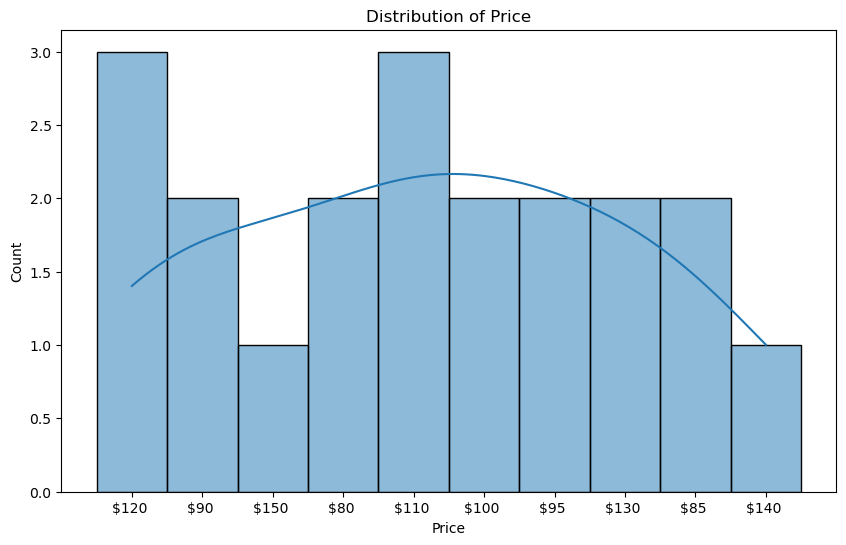

In [3]:
# Display basic statistics
print(merged_df.describe())

# Check for missing values
print(merged_df.isnull().sum())

# Visualize data distribution
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Distribution of Price
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Price'], bins=30, kde=True)
plt.title('Distribution of Price')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Assume 'features' contains the independent variables
features = merged_df.drop(['Price', ' Star Rating'], axis=1)
# Assume 'labels' contains the dependent variables
price_labels = merged_df['Price']
star_rating_labels = merged_df[' Star Rating']

In [6]:
# Display the head of the dataset and column types
print(merged_df.head())
print(merged_df.dtypes)

# Identify columns with non-numeric values
non_numeric_columns = merged_df.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_columns)

# Drop rows with non-numeric values in columns used for modeling
merged_df = merged_df.dropna(subset=['Shoe Name', 'Category', 'Price', 'Count of Sizes', 'Color 1',
       'Color 2', 'Color 3', 'Color 4', 'Color 5', 'Style Code / Product Code',
       'Reviews'], how='any')

# Assume 'features' contains the independent variables
features = merged_df.drop(['Price', ' Star Rating'], axis=1)
# Assume 'labels' contains the dependent variables
price_labels = merged_df['Price']
star_rating_labels = merged_df[' Star Rating']

    Shoe Name Category  No. of Colors  Price Count of Sizes Color 1 Color 2  \
0   Sneaker A      Men            4.0  $120             NaN     NaN     NaN   
1    Sandal B    Women            3.0   $90             NaN     NaN     NaN   
2      Boot C      Men            5.0  $150             NaN     NaN     NaN   
3      Heel D    Women            2.0   $80             NaN     NaN     NaN   
4  Athletic E      Men            4.0  $110             NaN     NaN     NaN   

  Color 3 Color 4 Color 5 Style Code / Product Code Reviews  Size  Comfort  \
0     NaN     NaN     NaN                       NaN     NaN   NaN      NaN   
1     NaN     NaN     NaN                       NaN     NaN   NaN      NaN   
2     NaN     NaN     NaN                       NaN     NaN   NaN      NaN   
3     NaN     NaN     NaN                       NaN     NaN   NaN      NaN   
4     NaN     NaN     NaN                       NaN     NaN   NaN      NaN   

   Durability/Quality/Performance (Quantifications)   St

In [7]:
# Assume 'features' contains the independent variables
features = merged_df.drop(['Price', ' Star Rating'], axis=1)
# Assume 'labels' contains the dependent variables
price_labels = merged_df['Price']
star_rating_labels = merged_df[' Star Rating']

# Display the number of samples in your dataset
print("Number of samples in the dataset:", len(merged_df))

# Check if the dataset has enough samples for splitting
if len(merged_df) > 1:
    # Split the data into training and testing sets for price prediction
    X_train_price, X_test_price, y_train_price, y_test_price = train_test_split(features, price_labels, test_size=0.2, random_state=42)

    # Check if there are enough samples for the price split
    if len(X_train_price) > 0 and len(X_test_price) > 0:
        # Scale the features for price prediction
        scaler_price = StandardScaler()
        X_train_scaled_price = scaler_price.fit_transform(X_train_price)
        X_test_scaled_price = scaler_price.transform(X_test_price)

        # Linear Regression for Price Prediction
        price_model = LinearRegression()
        price_model.fit(X_train_scaled_price, y_train_price)

        # Make predictions for price
        price_predictions = price_model.predict(X_test_scaled_price)

        # Evaluate the model for price prediction
        price_rmse = mean_squared_error(y_test_price, price_predictions, squared=False)
        print(f'Root Mean Squared Error for Price Prediction: {price_rmse}')

        # Split the data into training and testing sets for star rating prediction
        X_train_rating, X_test_rating, y_train_rating, y_test_rating = train_test_split(features, star_rating_labels, test_size=0.2, random_state=42)

        # Check if there are enough samples for the star rating split
        if len(X_train_rating) > 0 and len(X_test_rating) > 0:
            # Decision Tree for Star Rating Prediction
            star_rating_model = DecisionTreeClassifier()
            star_rating_model.fit(X_train_rating, y_train_rating)

            # Make predictions for star rating
            star_rating_predictions = star_rating_model.predict(X_test_rating)

            # Evaluate the model for star rating prediction
            star_rating_accuracy = accuracy_score(y_test_rating, star_rating_predictions)
            print(f'Accuracy for Star Rating Prediction: {star_rating_accuracy}')

            # Hyperparameter tuning using GridSearchCV for star rating prediction
            param_grid_rating = {'max_depth': [3, 5, 7, 10]}
            grid_search_rating = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid_rating, cv=5)
            grid_search_rating.fit(X_train_rating, y_train_rating)

            # Get the best parameters for star rating prediction
            best_params_rating = grid_search_rating.best_params_
            print(f'Best Parameters for Star Rating: {best_params_rating}')

            # Save the best model for star rating prediction
            best_star_rating_model = grid_search_rating.best_estimator_

            # Save the models using joblib or pickle
            import joblib

            joblib.dump(price_model, 'price_prediction_model.joblib')
            joblib.dump(best_star_rating_model, 'star_rating_prediction_model.joblib')

        else:
            print("Not enough samples for the star rating split.")
    else:
        print("Not enough samples for the price split.")
else:
    print("Not enough samples in the dataset for splitting.")


Number of samples in the dataset: 0
Not enough samples in the dataset for splitting.
